In [135]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [136]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

In [137]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [138]:
df.shape

(1599, 12)

In [139]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [140]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [141]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [142]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         

# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

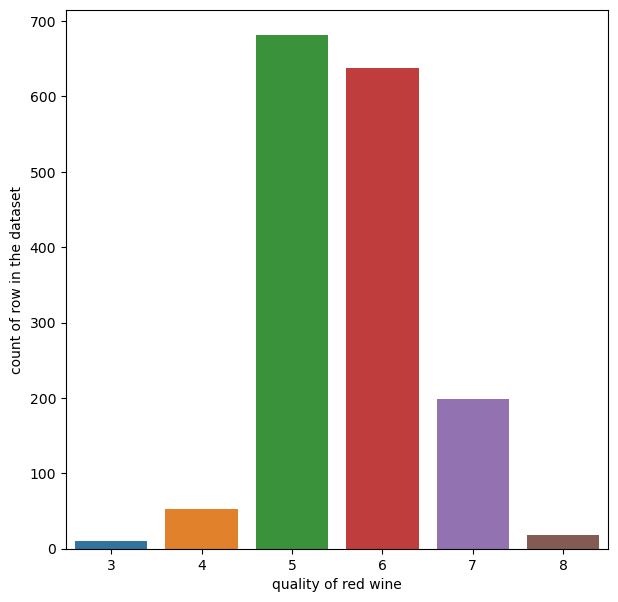

In [204]:
plt.figure(figsize=(7,7))
sns.countplot(x='quality',data=df)
plt.xlabel('quality of red wine')
plt.ylabel('count of row in the dataset')
plt.show

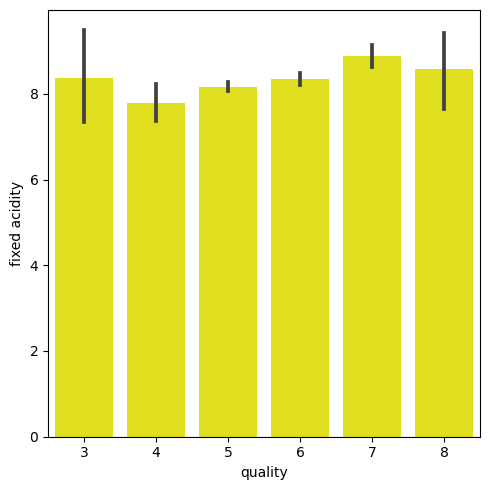

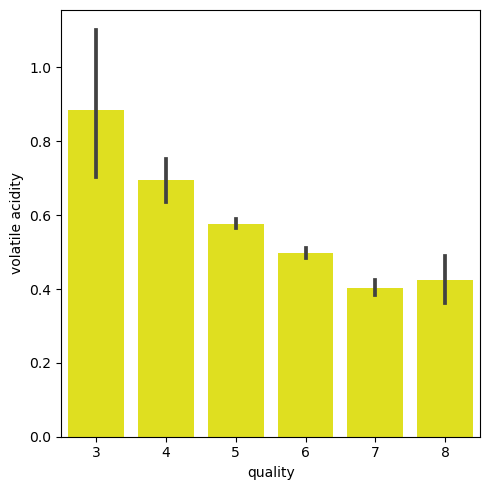

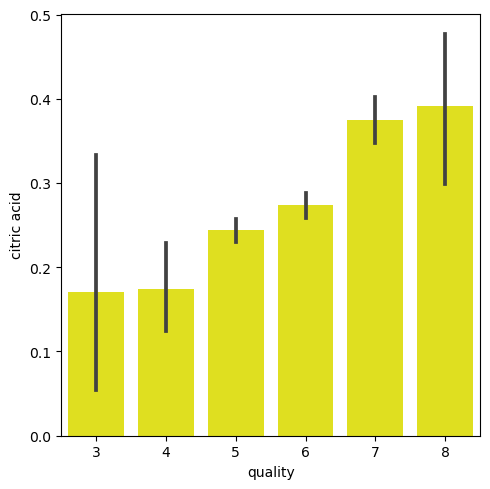

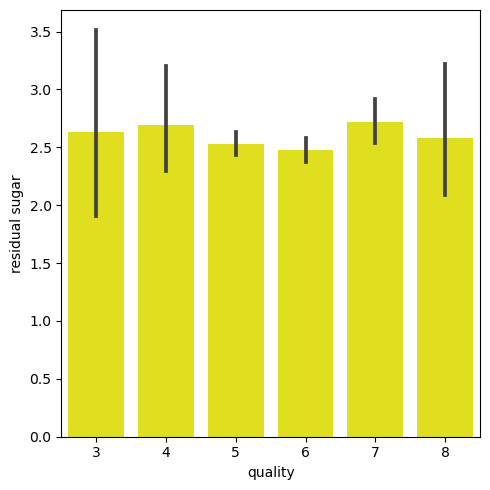

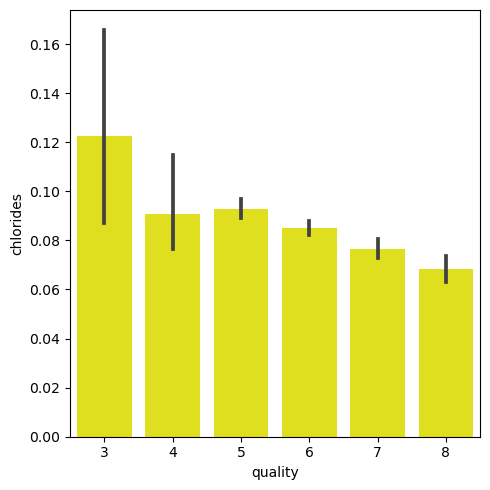

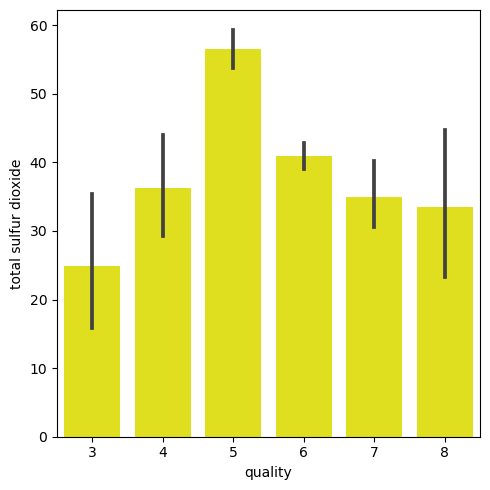

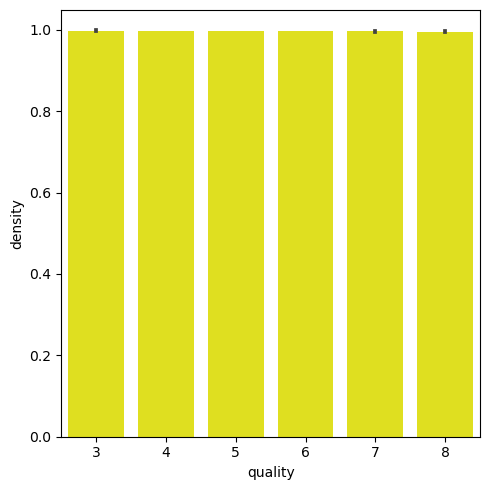

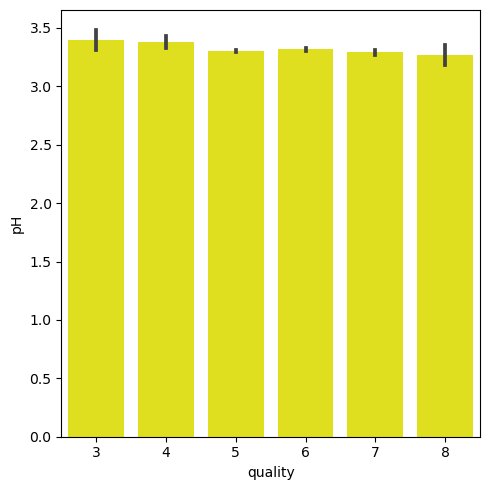

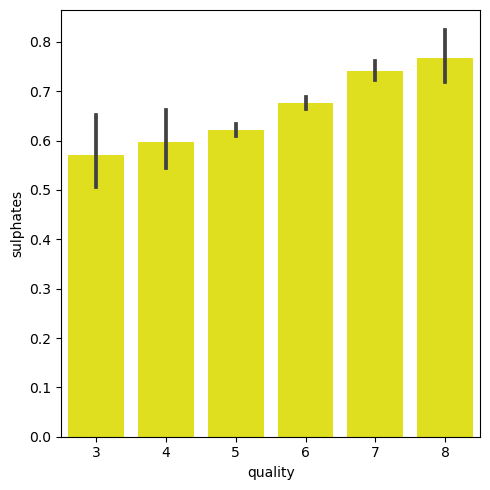

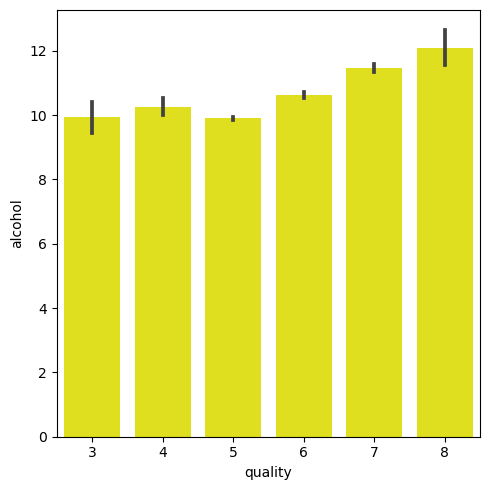

In [198]:
index=0
label=df['quality']
features=df.drop('quality',axis=1)

for col in features.items():
    plt.figure(figsize=(5,5))
    sns.barplot(x=label, y=col[index], data=df, color="yellow")
    plt.tight_layout()
    plt.show

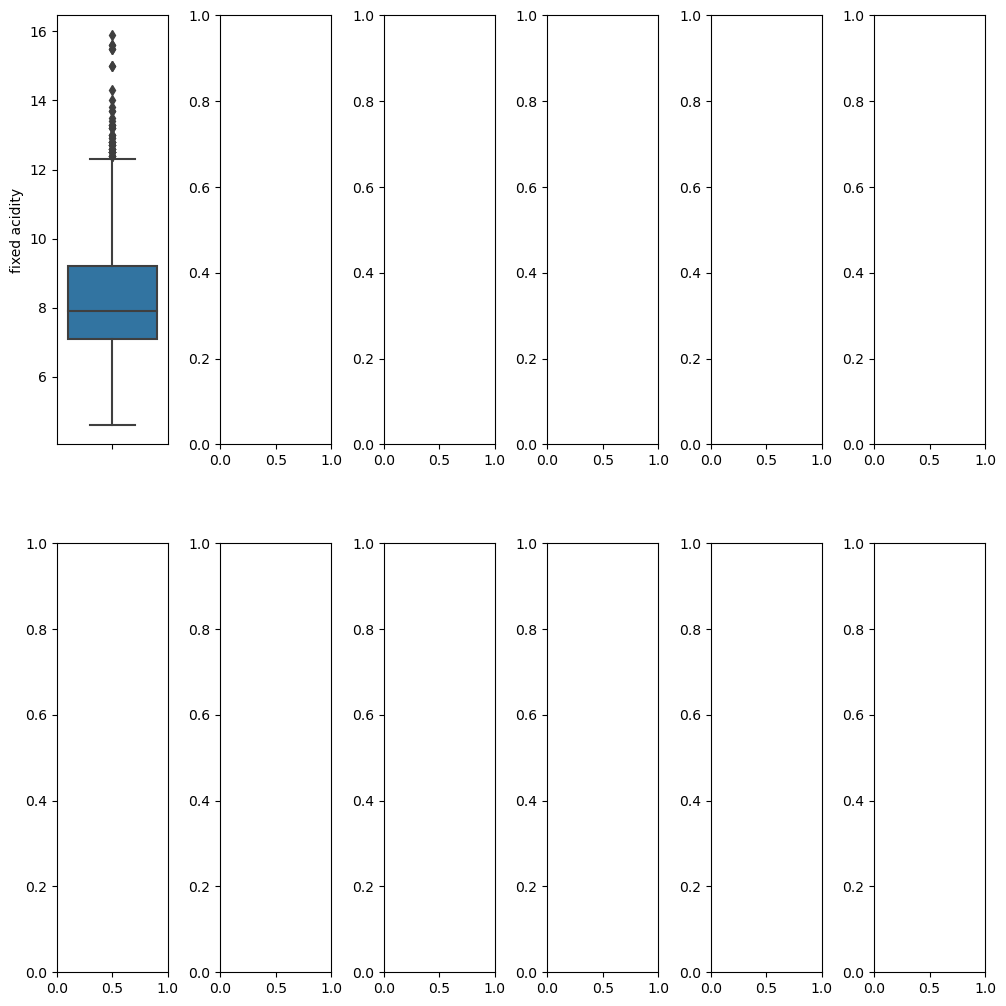

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [203]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(10,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1
    plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
    plt.show()
    

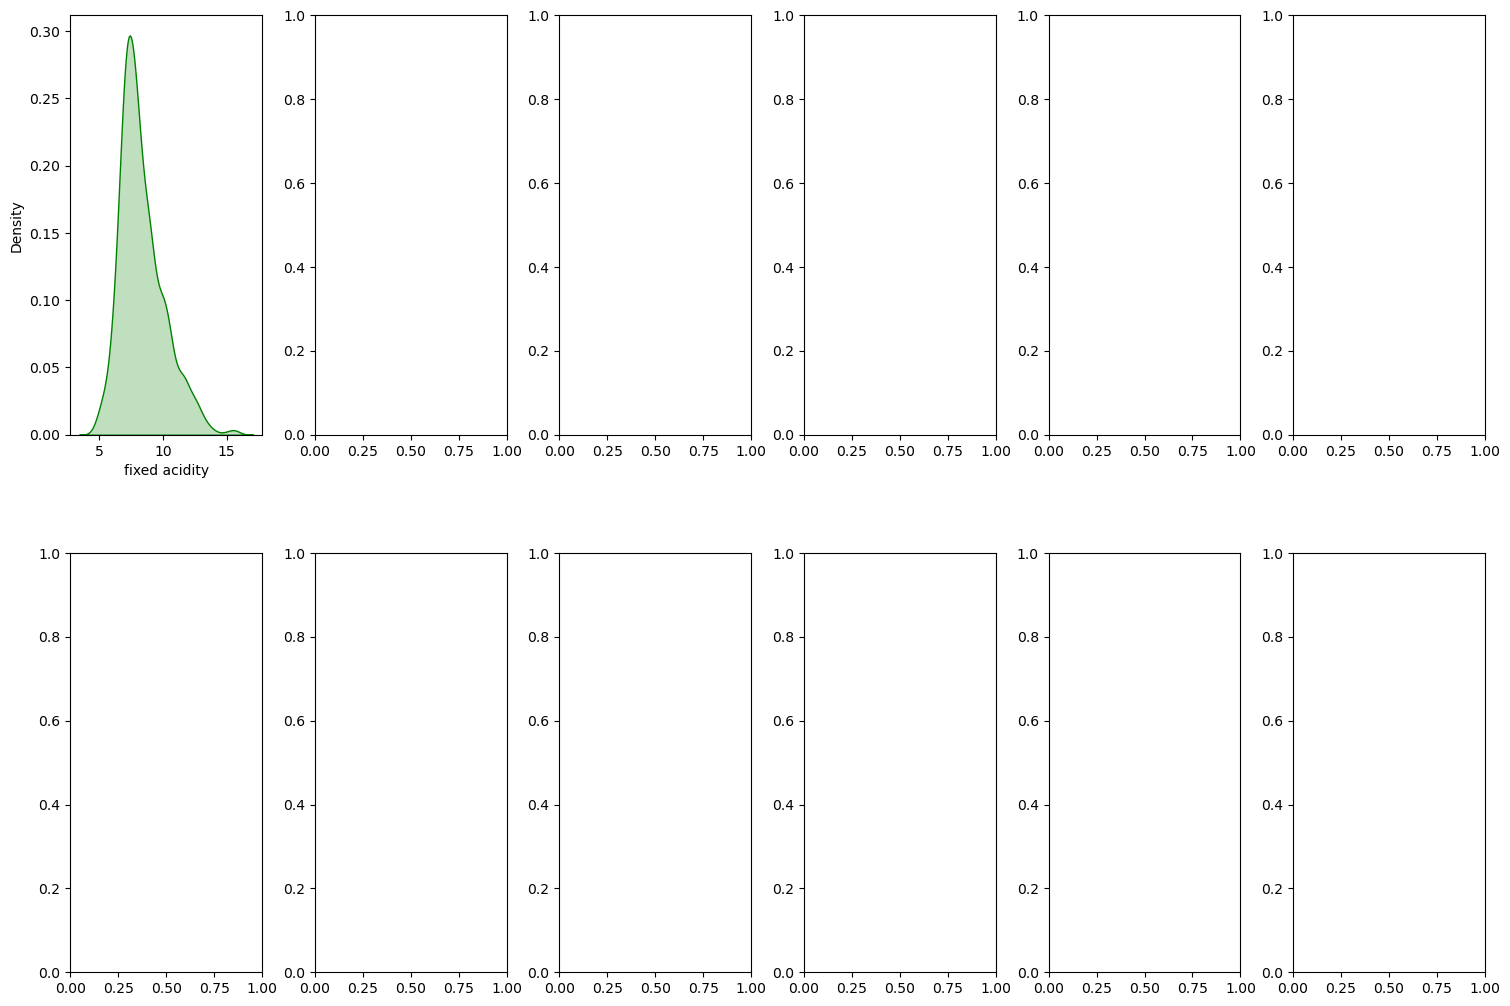

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [146]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade":True})
    index+=1
    plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
    plt.show()

# Correlation using heatmap

AttributeError: 'Text' object has no property 'Size'

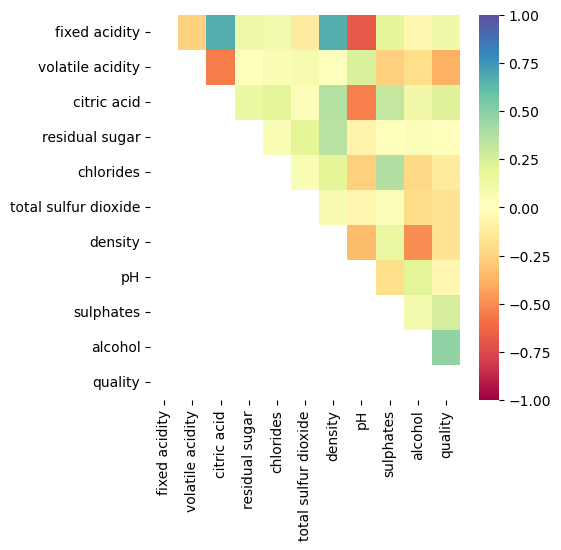

In [201]:
lower_triangle=np.tril(df.corr())
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='0.3f',
            annot_kws={'Size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [149]:
df=df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [150]:
df.shape

(1599, 11)

# Splitting feature & label

In [151]:
X = df.drop('quality', axis=1)
Y = df['quality']


In [152]:
Y.value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [153]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)
Y 

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [154]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


# FEATURE SCALING

In [155]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# classification & metrics

In [157]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [158]:
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 87.5

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       275
           1       0.59      0.36      0.44        45

    accuracy                           0.88       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320

Cross Validation Score: 86.74275078369907

Accuracy Score - Cross Validation Score is 0.7572492163009343


In [159]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 87.5

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       275
           1       0.59      0.36      0.44        45

    accuracy                           0.88       320
   macro avg       0.75      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320

Cross Validation Score: 86.74275078369907

Accuracy Score - Cross Validation Score is 0.7572492163009343


In [160]:
model=SVC(C=1.0,kernel='rbf', gamma='auto', random_state=42)
classify(model,X,Y)


Accuracy Score: 90.3125

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       275
           1       0.89      0.36      0.51        45

    accuracy                           0.90       320
   macro avg       0.90      0.67      0.73       320
weighted avg       0.90      0.90      0.88       320

Cross Validation Score: 87.05446708463951

Accuracy Score - Cross Validation Score is 3.258032915360488


In [161]:
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 87.5

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       275
           1       0.55      0.67      0.60        45

    accuracy                           0.88       320
   macro avg       0.74      0.79      0.76       320
weighted avg       0.89      0.88      0.88       320

Cross Validation Score: 81.23785266457679

Accuracy Score - Cross Validation Score is 6.262147335423208


In [162]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.125

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       275
           1       0.78      0.71      0.74        45

    accuracy                           0.93       320
   macro avg       0.87      0.84      0.85       320
weighted avg       0.93      0.93      0.93       320

Cross Validation Score: 86.67985893416927

Accuracy Score - Cross Validation Score is 6.445141065830725


In [163]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 89.375

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       275
           1       0.72      0.40      0.51        45

    accuracy                           0.89       320
   macro avg       0.81      0.69      0.73       320
weighted avg       0.88      0.89      0.88       320

Cross Validation Score: 85.9921630094044

Accuracy Score - Cross Validation Score is 3.3828369905956066


In [164]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 92.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       275
           1       0.81      0.64      0.72        45

    accuracy                           0.93       320
   macro avg       0.87      0.81      0.84       320
weighted avg       0.92      0.93      0.92       320

Cross Validation Score: 86.99294670846396

Accuracy Score - Cross Validation Score is 5.819553291536039


# Hyper parameter 

In [165]:
svs_param= {'kernel':['poly', 'sigmoid', 'rbf'],
                     'gamma':['scale','auto'],
                     'shrinking':[True,False],
                     'random_state':[21,42,104],
                     'probability':[True,False],
                     'decision_function_shape':['ovo','ovr'],
                     'verbose':[True,False]}

In [166]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC


In [167]:
GSCV=GridSearchCV(SVC(), svc_param, cv=5)

In [168]:
GSCV.fit(X_train,Y_train)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [170]:
GSCV.best_params_


{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [171]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 90.3125


# AUC&ROC CURVE

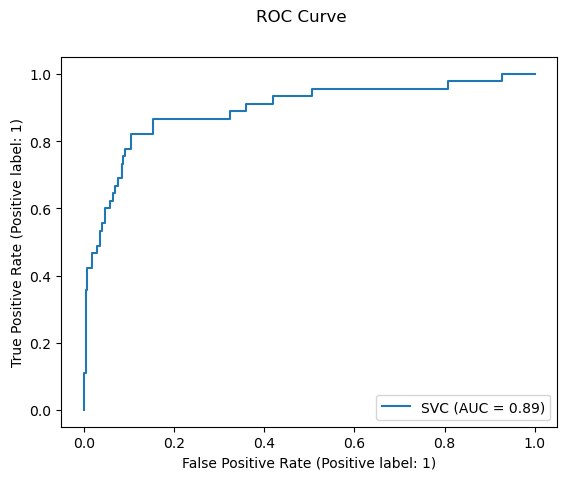

In [192]:
disp = metrics.RocCurveDisplay.from_estimator(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Saving the model

In [194]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']